# pymgcv: Generalized Additive Models in Python

**pymgcv** provides a clean python interface to R's powerful [mgcv](https://cran.r-project.org/web/packages/mgcv/index.html) library for fitting Generalized Additive Models (GAMs), along with visualisation tools.


## Installation

The package is currently in development and is not ready for production use. To install for development:

1. Install [pixi](https://pixi.sh/latest/)
2. Clone and set up the development environment:

```bash
git clone https://github.com/danielward27/pymgcv.git
cd pymgcv
pixi shell --environment=dev
```

In the future, we will add the package to a conda channel, such that it can be installed with ``conda add pymgcv`` or ``pixi add pymgcv``.

## What are GAMs?

Generalized Additive Models (GAMs) are a flexible class of statistical models that extend linear models by allowing non-linear relationships between predictors and the response variable. For example the model may have the form

$$
g(\mathbb{E}[Y]) = \beta_0 + \sum_{j=1}^p f_j(x_j),
$$
Where:

- $g$ is the link function, which transforms the expected value of the response variable to a space where modelling with the sum of smooths is reasonable.
- $f_j$ are smooth functions (e.g. splines) which capture the non-linear relationship between the features and the response.

Why GAMs?

- **Flexibility**: Capture non-linear relationships automatically
- **Interpretability**: The additive nature allows each term to be visualized and understood separately
- **Statistical rigor**: Built-in smoothing parameter estimation and uncertainty quantification

## Simple example

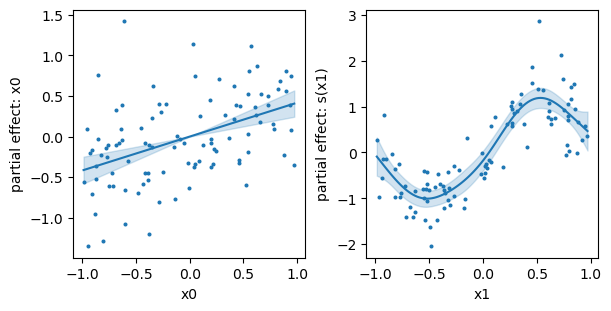

In [3]:
import pandas as pd
import numpy as np
from pymgcv import GAM, Smooth as S, Linear as L
from pymgcv.plot import plot_continuous_1d
import matplotlib.pyplot as plt

# Generate sample data with non-linear relationship
np.random.seed(42)
n = 100
x0 = np.random.uniform(-1, 1, n)
x1 = np.random.uniform(-1, 1, n)
y = 0.5 * x0 + np.sin(np.pi * x1) + np.random.normal(0, 0.5, n)
data = pd.DataFrame({'x0': x0, 'x1': x1, 'y': y})

# Define model: linear effect of x0, smooth function of x1 
model = GAM({'y': L('x0') + S('x1')})

# Fit the model
model = model.fit(data)

fig, axes = plt.subplots(ncols=2, layout="constrained", figsize=(6, 3))
plot_continuous_1d('y', L('x0'), model, data, ax=axes[0])
plot_continuous_1d('y', S('x1'), model, data, ax=axes[1])
plt.show()


## What next?

The key bits of information to explore:

1. **[Terms](./api/terms.md)**: The types of terms supported by **pymgcv** (e.g. smooths, linear, interactions, etc)
2. **[Basis Functions](./api/basis_functions.md)**: The different types of basis functions available
3. The examples in the side bar!